In [1]:
import pandas as pd
# pd.set_option('max_rows',1000)
# pd.set_option('max_columns',1000)

In [78]:
# 评分代码
from sklearn.metrics import r2_score
def online_score(pred):
    print("预测结果最大值：{},预测结果最小值：{}".format(pred.max(),pred.min()))
    # a榜测分
    conmbine1 = pd.read_csv("sub_a_913.csv")
    score1 = r2_score(pred, conmbine1)
#     # b榜测分
#     conmbine3 = pd.read_csv("sub_b_9194.csv")
#     score3= r2_score(pred, conmbine3)
#     print("对比919分数:{}".format(score3))
    return score1

In [3]:
#读取数据
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_a.csv')

In [4]:
#观察数据
print(train_data.head())

          ID    area rentType houseType houseFloor  totalFloor houseToward  \
0  100309852   68.06     未知方式    2室1厅1卫          低          16        暂无数据   
1  100307942  125.55     未知方式    3室2厅2卫          中          14        暂无数据   
2  100307764  132.00     未知方式    3室2厅2卫          低          32        暂无数据   
3  100306518   57.00     未知方式    1室1厅1卫          中          17        暂无数据   
4  100305262  129.00     未知方式    3室2厅3卫          低           2        暂无数据   

  houseDecoration communityName city  ... landTotalPrice landMeanPrice  \
0              其他       XQ00051   SH  ...              0        0.0000   
1              简装       XQ00130   SH  ...              0        0.0000   
2              其他       XQ00179   SH  ...              0        0.0000   
3              精装       XQ00313   SH  ...      332760000     3080.0331   
4              毛坯       XQ01257   SH  ...              0        0.0000   

  totalWorkers  newWorkers  residentPopulation      pv     uv  lookNum  \
0        282

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [6]:
train_data["city"].value_counts()

SH    41440
Name: city, dtype: int64

In [7]:
train_data["rentType"].value_counts()

未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64

In [8]:
print(train_data.describe())

                 ID          area    totalFloor  saleSecHouseNum  \
count  4.144000e+04  41440.000000  41440.000000     41440.000000   
mean   1.001221e+08     70.959409     11.413152         1.338538   
std    9.376566e+04     88.119569      7.375203         3.180349   
min    1.000000e+08      1.000000      0.000000         0.000000   
25%    1.000470e+08     42.607500      6.000000         0.000000   
50%    1.000960e+08     65.000000      7.000000         0.000000   
75%    1.001902e+08     90.000000     16.000000         1.000000   
max    1.003218e+08  15055.000000     88.000000        52.000000   

       subwayStationNum  busStationNum  interSchoolNum     schoolNum  \
count      41440.000000   41440.000000    41440.000000  41440.000000   
mean           5.741192     187.197153        1.506395     48.228813   
std            4.604929     179.674625        1.687631     29.568448   
min            0.000000      24.000000        0.000000      9.000000   
25%            2.000000    

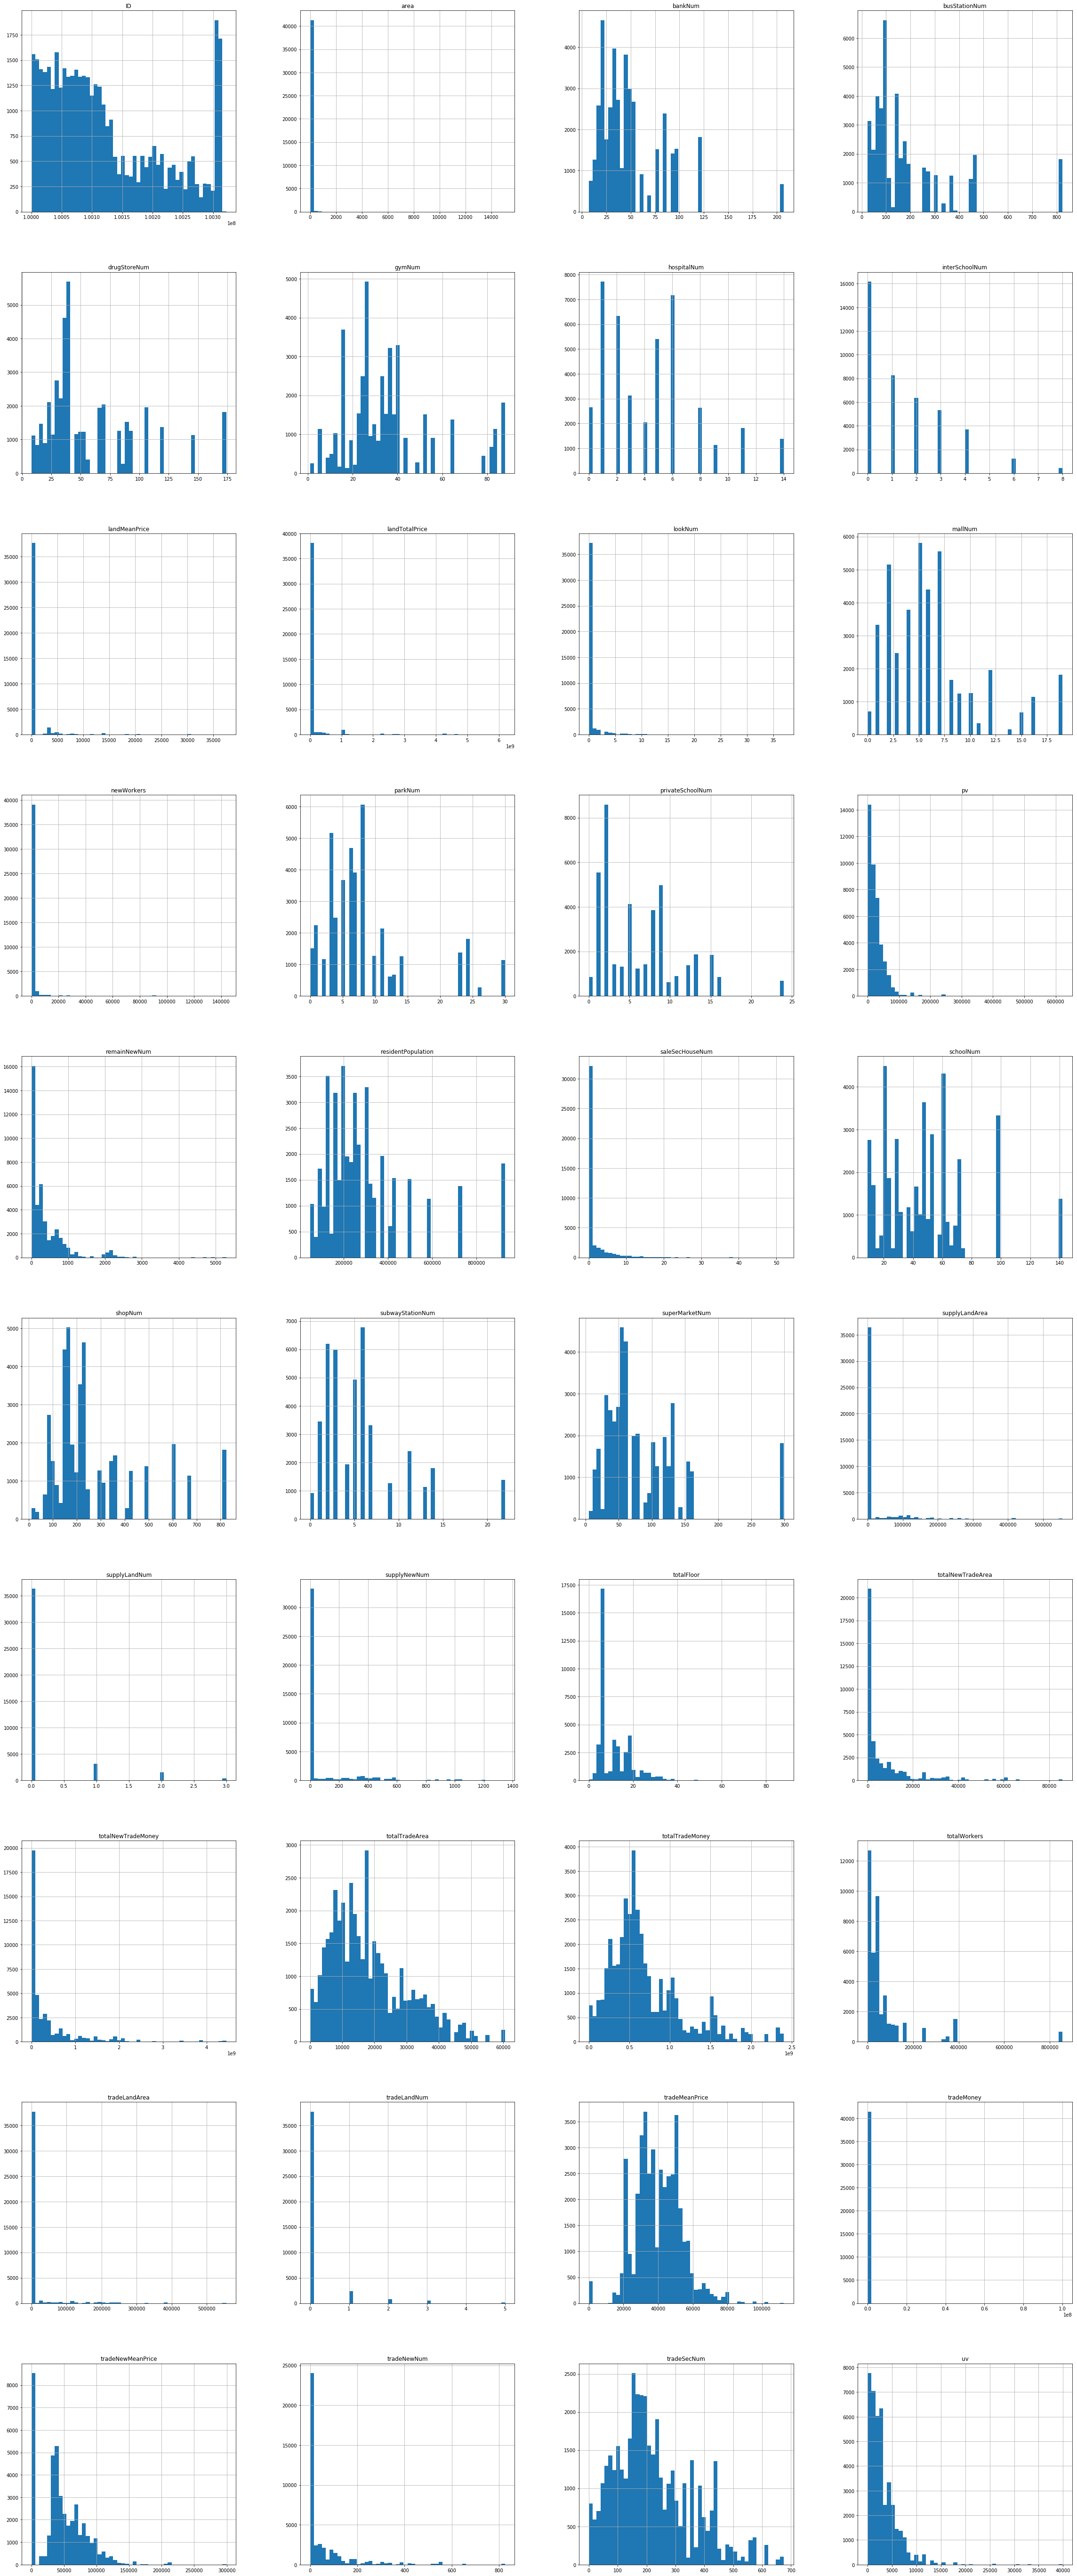

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(40,110),layout=(11,4)) #figsize=(width,length)是整张大图的size，layout=(num_rows,num_columns）
plt.show()

In [10]:
# EDA分析:

# 一、数据分析
# 1.缺失值分析

# 二、特征值分析
# 1.是否有单调特征列(单调的特征列很大可能是时间)

# 三、特征nunique分布
# 1.出现在测试集中的community，但是在训练集中数量较少
# 2.统计特征值出现频次大于100的特征

# 四、Label分布
# 1.不同的特征值的样本的label的分布

In [11]:
# 画图观察各特征与label间的线性关系
# 方法一：Pearson's r
corr_matrix = train_data.corr()
corr_matrix["tradeMoney"].sort_values(ascending=False)

tradeMoney            1.000000
newWorkers            0.081790
totalWorkers          0.026174
bankNum               0.019532
tradeNewMeanPrice     0.013257
totalNewTradeMoney    0.009676
gymNum                0.009296
mallNum               0.009277
interSchoolNum        0.007757
tradeMeanPrice        0.006968
area                  0.006719
privateSchoolNum      0.006595
totalFloor            0.006358
totalTradeMoney       0.005548
lookNum               0.004952
tradeSecNum           0.004473
totalNewTradeArea     0.001709
parkNum               0.001657
supplyNewNum          0.000916
schoolNum             0.000568
totalTradeArea        0.000412
saleSecHouseNum       0.000391
subwayStationNum     -0.000733
tradeNewNum          -0.001053
landTotalPrice       -0.001605
landMeanPrice        -0.001715
remainNewNum         -0.001745
tradeLandArea        -0.002086
tradeLandNum         -0.002218
supplyLandArea       -0.002614
uv                   -0.002836
supplyLandNum        -0.002892
superMar

In [12]:
train_features = train_data.drop("tradeMoney",axis=1)
train_labels = train_data["tradeMoney"].copy()

In [18]:
# 对数字特征进行中值填充
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
train_numerical_features = train_features.drop(columns = train_features.columns[[2,3,4,6,7,8,9,10,11,12,49]])
# print(train_numerical_features.info())
imputer.fit(train_numerical_features) #中值可以用train_numerical_features.median().values获得，被存放在imputer.statistics
X = imputer.transform(train_numerical_features)
X_df = pd.DataFrame(X, columns = train_numerical_features.columns)
# print(X_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 39 columns):
ID                    41440 non-null float64
area                  41440 non-null float64
totalFloor            41440 non-null float64
saleSecHouseNum       41440 non-null float64
subwayStationNum      41440 non-null float64
busStationNum         41440 non-null float64
interSchoolNum        41440 non-null float64
schoolNum             41440 non-null float64
privateSchoolNum      41440 non-null float64
hospitalNum           41440 non-null float64
drugStoreNum          41440 non-null float64
gymNum                41440 non-null float64
bankNum               41440 non-null float64
shopNum               41440 non-null float64
parkNum               41440 non-null float64
mallNum               41440 non-null float64
superMarketNum        41440 non-null float64
totalTradeMoney       41440 non-null float64
totalTradeArea        41440 non-null float64
tradeMeanPrice        41440 non-null

In [54]:
#对文本特征进行向量化
train_text_features = train_features[train_features.columns[[2,4,6,7,8,9,10,11,12,49]]]
print(train_text_features.head())


  rentType houseFloor houseToward houseDecoration communityName city   region  \
0     未知方式          低        暂无数据              其他       XQ00051   SH  RG00001   
1     未知方式          中        暂无数据              简装       XQ00130   SH  RG00002   
2     未知方式          低        暂无数据              其他       XQ00179   SH  RG00002   
3     未知方式          中        暂无数据              精装       XQ00313   SH  RG00002   
4     未知方式          低        暂无数据              毛坯       XQ01257   SH  RG00003   

     plate buildYear   tradeTime  
0  BK00064      1953  2018/11/28  
1  BK00049      2007  2018/12/16  
2  BK00050      暂无信息  2018/12/22  
3  BK00051      暂无信息  2018/12/21  
4  BK00044      暂无信息  2018/11/18  


In [55]:
train_data["rentType"].value_counts()

未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64

In [56]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
rentType_cat = cat_encoder.fit_transform(train_data[["rentType"]])
rentType_cat

<41440x4 sparse matrix of type '<class 'numpy.float64'>'
	with 41440 stored elements in Compressed Sparse Row format>

In [57]:
houseType_cat = cat_encoder.fit_transform(train_data[["houseType"]])
houseType_cat

<41440x104 sparse matrix of type '<class 'numpy.float64'>'
	with 41440 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
houseFloor_cat = ordinal_encoder.fit_transform(train_data[["houseFloor"]])
houseFloor_cat[:10]
ordinal_encoder.categories_

[array(['中', '低', '高'], dtype=object)]

In [59]:
train_data["houseToward"].value_counts()

南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64

In [60]:
houseToward_cat = cat_encoder.fit_transform(train_data[["houseToward"]])
houseToward_cat

<41440x10 sparse matrix of type '<class 'numpy.float64'>'
	with 41440 stored elements in Compressed Sparse Row format>

In [61]:
train_data["houseDecoration"].value_counts()

其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64

In [62]:
houseDecoration_cat = ordinal_encoder.fit_transform(train_data[["houseDecoration"]])

In [63]:
train_data["communityName"].value_counts()

XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
XQ01389    166
XQ01658    163
XQ02789    152
XQ00530    151
XQ01561    151
XQ01339    132
XQ01873    122
XQ00826    122
XQ02296    121
XQ01232    119
XQ01401    118
XQ02441    117
XQ00196    115
XQ01207    109
XQ02365    109
XQ01410    108
XQ00852    105
XQ02072    103
XQ01672    103
XQ01375     99
XQ01642     99
XQ01634     99
XQ01970     96
XQ00210     93
XQ01413     92
          ... 
XQ01557      1
XQ00231      1
XQ02723      1
XQ00319      1
XQ01702      1
XQ00990      1
XQ01677      1
XQ03435      1
XQ04024      1
XQ01727      1
XQ02281      1
XQ00719      1
XQ04017      1
XQ02874      1
XQ02169      1
XQ02690      1
XQ04034      1
XQ01934      1
XQ02568      1
XQ03469      1
XQ02644      1
XQ01880      1
XQ03372      1
XQ01492      1
XQ01729      1
XQ03814      1
XQ00250      1
XQ02747      1
XQ00189      1
XQ00317      1
Name: communityName, Length: 4236, dtype: int64

In [64]:
train_data["city"].value_counts()

SH    41440
Name: city, dtype: int64

In [65]:
train_data["region"].value_counts()

RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64

In [66]:
train_data["plate"].value_counts()

BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
BK00052    1375
BK00017    1305
BK00041    1266
BK00054    1256
BK00051    1253
BK00046    1227
BK00035    1156
BK00042    1137
BK00009    1016
BK00050     979
BK00043     930
BK00026     906
BK00047     880
BK00034     849
BK00013     834
BK00053     819
BK00028     745
BK00040     679
BK00060     671
BK00010     651
BK00029     646
BK00062     618
BK00022     614
BK00018     613
BK00064     590
           ... 
BK00037     444
BK00012     412
BK00038     398
BK00024     397
BK00020     384
BK00002     357
BK00065     348
BK00027     344
BK00039     343
BK00063     281
BK00057     278
BK00015     253
BK00006     231
BK00021     226
BK00007     225
BK00030     219
BK00066     219
BK00049     211
BK00008     210
BK00004     189
BK00048     165
BK00025     157
BK00023     127
BK00059     122
BK00044      98
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66,

In [67]:
train_data["buildYear"].value_counts()

1994    2851
暂无信息    2808
2006    2007
2007    1851
2008    1849
2005    1814
2010    1774
1995    1685
1993    1543
2011    1498
2004    1431
2009    1271
2014    1238
2003    1156
1997    1125
2002    1120
2012    1049
1996     991
2000     925
2001     898
2015     840
1999     822
1998     733
2013     714
1987     632
1983     612
1991     545
1984     493
1980     452
1990     431
        ... 
1964      39
1960      33
1930      30
1973      23
1955      20
1932      19
2017      14
1952      12
1936      12
1931      11
1968      10
1965       8
1967       7
1920       5
1910       5
1937       5
1940       4
1963       4
1949       4
1969       3
1970       3
1912       3
1959       3
1961       2
1972       2
1939       2
1926       2
1962       1
1951       1
1950       1
Name: buildYear, Length: 80, dtype: int64

In [68]:
train_data["tradeTime"].value_counts()

2018/3/3      543
2018/3/4      487
2018/3/11     410
2018/3/10     400
2018/3/24     341
2018/3/18     339
2018/3/1      332
2018/3/17     328
2018/3/5      296
2018/2/25     292
2018/3/8      291
2018/3/25     283
2018/3/2      276
2018/3/9      272
2018/3/12     260
2018/3/31     258
2018/3/7      252
2018/6/10     250
2018/8/19     234
2018/3/6      229
2018/7/29     225
2018/2/28     223
2018/7/1      221
2018/8/26     220
2018/3/15     218
2018/5/20     218
2018/5/27     217
2018/4/22     210
2018/7/14     210
2018/6/23     209
             ... 
2018/12/19     41
2018/1/24      41
2018/12/20     40
2018/1/23      39
2018/12/14     37
2018/1/29      37
2018/10/2      35
2018/2/11      34
2018/1/10      33
2018/1/6       32
2018/1/25      32
2018/1/14      32
2018/1/15      31
2018/1/30      31
2018/1/22      30
2018/1/5       27
2018/1/8       27
2018/1/19      21
2018/1/3       19
2018/1/17      18
2018/1/16      17
2018/1/1       16
2018/2/12      15
2018/1/4       14
2018/1/18 

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
from sklearn.compose import ColumnTransformer
name_numerical_features = list(train_numerical_features.columns)
name_text_features = list(train_text_features.columns)

In [70]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, name_numerical_features),
    ("cat", OneHotEncoder(), name_text_features),
])

In [71]:
train_features_prepared = full_pipeline.fit_transform(train_features)

In [72]:
# 进行拟合
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_features_prepared, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
test_features_prepared = full_pipeline.transform(test_data)

In [79]:
pred = lin_reg.predict(test_features_prepared)
score1 = online_score(pred)
score1

预测结果最大值：24657807.076674912,预测结果最小值：-562402.9443713687


0.00033410039132442115

In [80]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_features_prepared, train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
pred = tree_reg.predict(test_features_prepared)
score1 = online_score(pred)
score1

预测结果最大值：360000.0,预测结果最小值：230.0


0.08921899076605455